<h3>Τεχνικές Εξόρυξης Δεδομένων
Εαρινό Εξάμηνο 2019-2020
2η Άσκηση
</h3>

In [1]:
import glob
import pandas as pd
import numpy as np
import os
import io
import csv
import csv
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

from sklearn import preprocessing


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:

# train = 'train_set.tsv'
# counter = 0
# with open(train, 'wt') as out_file:
#     tsv_writer = csv.writer(out_file, delimiter='\t')
#     tsv_writer.writerow(['Id', 'Title','Content','Category'])
#     work_dir = "fulltext/data/business"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"business"])
#             counter += 1
#     work_dir = "fulltext/data/entertainment"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"entertainment"])
#             counter += 1
#     work_dir = "fulltext/data/politics"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"politics"])
#             counter += 1
#     work_dir = "fulltext/data/tech"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"tech"])
#             counter += 1
#     work_dir = "fulltext/data/sport"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"sport"])
#             counter += 1
          


In [3]:
trainDf = pd.read_csv("train_set.tsv",sep='\t')
trainDf = trainDf.replace('\n','', regex=True)

In [4]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        2225 non-null   int64 
 1   Title     2225 non-null   object
 2   Content   2225 non-null   object
 3   Category  2225 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


In [5]:
businessDf = trainDf.loc[trainDf['Category'] == 'business'] 
entertainmentDf = trainDf.loc[trainDf['Category'] == 'entertainment'] 
politicsDf = trainDf.loc[trainDf['Category'] == 'politics'] 
sportDf = trainDf.loc[trainDf['Category'] == 'sport'] 
techDf = trainDf.loc[trainDf['Category'] == 'tech'] 

<h3>1. Δημιουργία WordCloud</h3>

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS) 

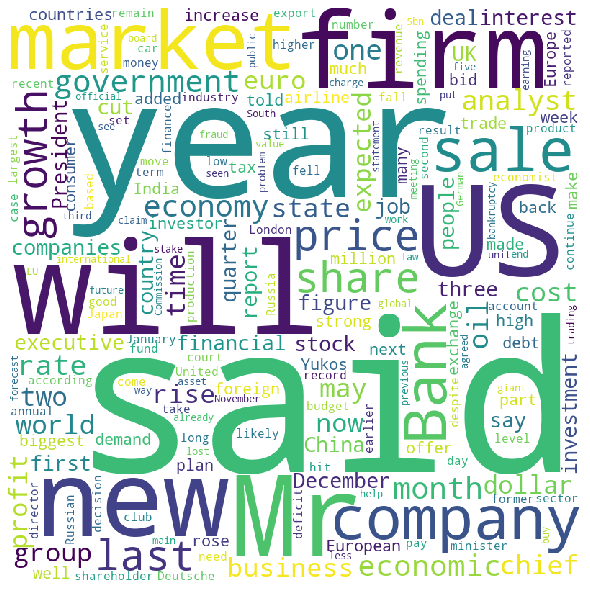

In [7]:
businessList = businessDf['Content'].tolist()
flatList = []
for b in businessList:
    parsed = b.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

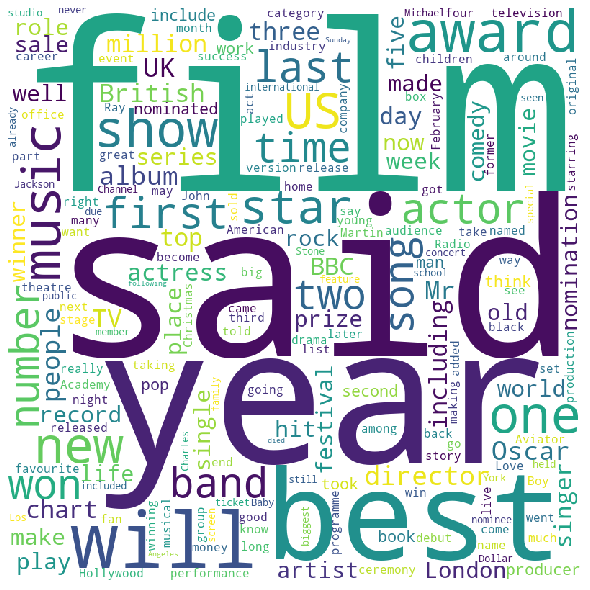

In [8]:
entertainmentList = entertainmentDf['Content'].tolist()
flatList = []
for e in entertainmentList:
    parsed = e.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

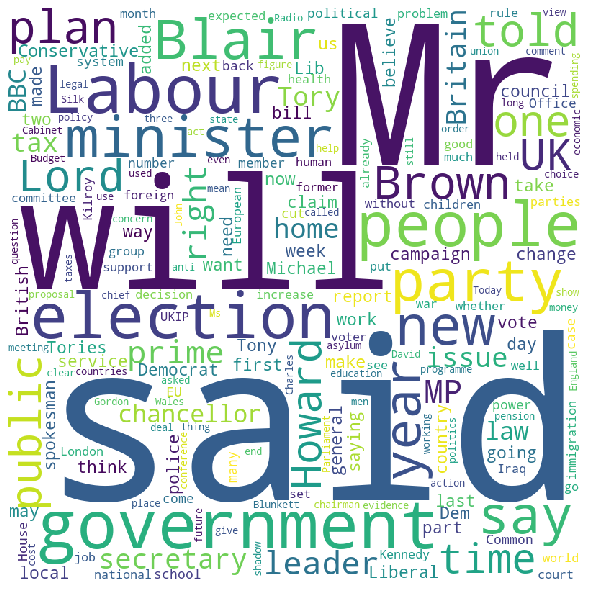

In [9]:
politicsList = politicsDf['Content'].tolist()
flatList = []
for p in politicsList:
    parsed = p.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

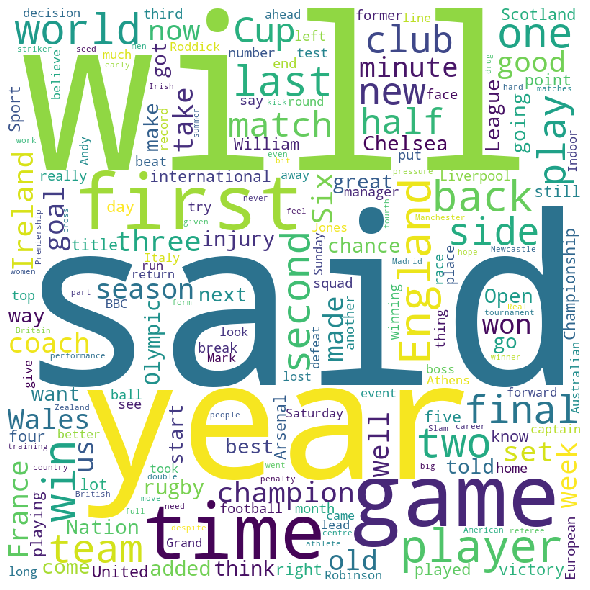

In [10]:
sportList = sportDf['Content'].tolist()
flatList = []
for s in sportList:
    parsed = s.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

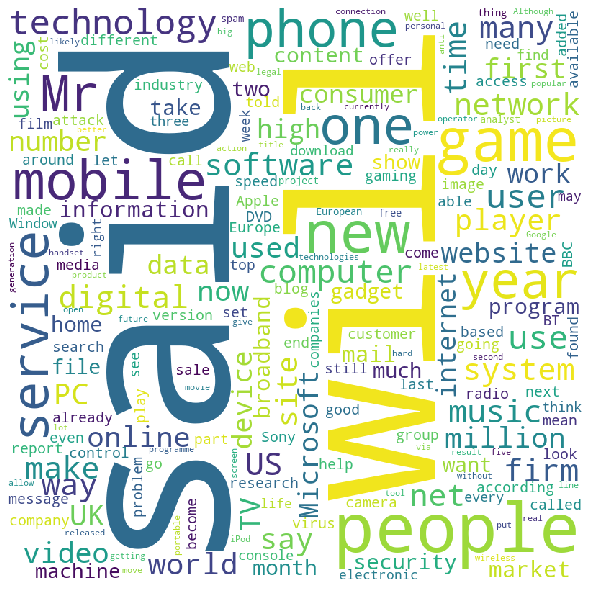

In [11]:
techList = techDf['Content'].tolist()
flatList = []
for t in techList:
    parsed = t.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [12]:
trainDf

,Id,Title,Content,Category
0,0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarn...,business
1,1,Dollar gains on Greenspan speech,The dollar has hit its highest level against...,business
2,2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yu...,business
3,3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices ...,business
4,4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dom...,business
...,...,...,...,...
2220,2220,Big guns ease through in San Jose,Top-seeded Americans Andy Roddick and Andre ...,sport
2221,2221,Almagro continues Spanish surge,Unseeded Nicolas Almagro became the fifth Sp...,sport
2222,2222,Melzer shocks Agassi in San Jose,Second seed Andre Agassi suffered a comprehe...,sport
2223,2223,Mirza makes Indian tennis history,Teenager Sania Mirza completed a superb week...,sport


<h3>2.Υλοποίηση Κατηγοριοποίησης (Classification)</h3>

In [13]:
content_train, content_test, category_train, category_test = train_test_split(trainDf['Content'], trainDf['Category'], test_size=0.2)

#create numeric categories using the LabelEncoder and fit-transorm pipeline
le = preprocessing.LabelEncoder()
le.fit(category_train)
category_train = le.transform(category_train)
category_test = le.transform(category_test)

In [89]:
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
contentList = content_train.tolist()
X_train = vectorizer.fit_transform(contentList)
testList = content_test.tolist()
X_test = vectorizer.transform(testList)
vectorizer.

In [91]:

print(X_train[0])

  (0, 130)	0.15868358789642573
  (0, 473)	0.15254088039765581
  (0, 563)	0.14295386788323527
  (0, 710)	0.14960369087359524
  (0, 308)	0.09938301331380511
  (0, 372)	0.11873543606211913
  (0, 932)	0.13263269853645043
  (0, 568)	0.13729726348434423
  (0, 358)	0.12309412856190943
  (0, 169)	0.12801910430729874
  (0, 598)	0.07721736423441777
  (0, 518)	0.1243185807106081
  (0, 49)	0.15817412085315394
  (0, 749)	0.14261649032986756
  (0, 501)	0.13111430706892524
  (0, 938)	0.28456417060917116
  (0, 528)	0.15254088039765581
  (0, 913)	0.13643133866734175
  (0, 914)	0.08763985131112552
  (0, 225)	0.129654329964363
  (0, 279)	0.1024030964105267
  (0, 994)	0.062088768025887794
  (0, 361)	0.14960369087359524
  (0, 254)	0.12113726608255929
  (0, 318)	0.17135185709017653
  (0, 652)	0.13013477593459355
  (0, 147)	0.28259238573096035
  (0, 52)	0.16302600129459685
  (0, 968)	0.09821834181196377
  (0, 200)	0.1370064212577773
  (0, 613)	0.2150090453997599
  (0, 90)	0.3183999733530316
  (0, 612)	0.0683

In [15]:
classifier = LogisticRegression()
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)
# predictions

In [16]:
from sklearn import metrics
print(metrics.accuracy_score(category_test, predictions))

0.9662921348314607


Support Vector Machines

In [17]:
classifier = svm.SVC()
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)


In [18]:
print(metrics.accuracy_score(category_test, predictions))

0.9707865168539326


Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)

In [22]:
print(metrics.accuracy_score(category_test, predictions))

0.7033707865168539


Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import *
from scipy import *

In [38]:
classifier = GaussianNB()
classifier.fit(X_train.todense(), category_train)
predictions = classifier.predict(X_test.todense())

In [39]:
print(metrics.accuracy_score(category_test, predictions))

0.9146067415730337


In [57]:
print(X_train[0])

  (0, 187)	0.06811972668893859
  (0, 212)	0.13623945337787718
  (0, 241)	0.0645749447074493
  (0, 423)	0.039635791398382664
  (0, 611)	0.04192951309890185
  (0, 947)	0.06811972668893859
  (0, 1168)	0.045047746676192664
  (0, 1781)	0.015587628898146352
  (0, 1799)	0.03643389681831638
  (0, 1832)	0.040519625016412666
  (0, 1836)	0.03755148110090867
  (0, 1958)	0.24043619026842913
  (0, 1983)	0.016468263898264276
  (0, 2009)	0.045365691099000405
  (0, 2050)	0.027060094285010203
  (0, 2180)	0.025270568125115522
  (0, 2209)	0.06168051606809788
  (0, 2499)	0.20435918006681578
  (0, 2609)	0.011474591733732588
  (0, 2670)	0.04843778996197846
  (0, 2727)	0.043163328019889924
  (0, 2842)	0.07334039040981165
  (0, 3278)	0.05435934155322008
  (0, 3976)	0.04891047308048971
  (0, 3997)	0.03655124768195184
  :	:
  (0, 22490)	0.053215952727868256
  (0, 22560)	0.06811972668893859
  (0, 22561)	0.06811972668893859
  (0, 22918)	0.03340941757731507
  (0, 23139)	0.04941018097500059
  (0, 23950)	0.0208168381

K-Nearest Neighbor

In [40]:
# Example of making predictions
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Test distance function
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
prediction = predict_classification(dataset, dataset[0], 3)
prediction = predict_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Expected 0, Got 0.


<h3>4. Υλοποίηση Συσταδοποίησης (Clustering)</h3>